In [1]:
# Hidden TimeStamp
import time, datetime
st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d %H:%M:%S')
print('Last Run: ', st)

Last Run:  2016-07-26 09:17:11


In [2]:
# Hidden Working Directory
# Run this cell only once
from IPython.display import clear_output

%cd ../
clear_output()

In [3]:
# Hidden Versioning
import numpy, matplotlib, pandas, six, openpyxl, xlrd, version_information, lamana
%reload_ext version_information
%version_information numpy, matplotlib, pandas, six, openpyxl, xlrd, version_information, lamana

Software,Version
Python,3.5.1 64bit [MSC v.1900 64 bit (AMD64)]
IPython,4.1.2
OS,Windows 10 10.0.10586 SP0
numpy,1.11.1
matplotlib,1.5.1
pandas,0.18.1
six,1.10.0
openpyxl,2.3.5
xlrd,1.0.0
version_information,1.0.3


In [4]:
# Hidden Namespace Reset
%reset -sf
%whos

Interactive namespace is empty.


# Demonstration

The following demonstration includes basic and intermediate uses of the LamAna Project library.  It is intended to exhaustively reference all API features, therefore some advandced demonstrations will favor technical detail. 

# Tutorial: Basic

## User Input Startup

In [5]:
#------------------------------------------------------------------------------
import pandas as pd

import lamana as la
#import LamAna as la

%matplotlib inline
#%matplotlib nbagg
# PARAMETERS ------------------------------------------------------------------
# Build dicts of geometric and material parameters
load_params = {'R' : 12e-3,                                # specimen radius
               'a' : 7.5e-3,                               # support ring radius
               'r' : 2e-4,                                 # radial distance from center loading
               'P_a' : 1,                                  # applied load
               'p' : 5,                                    # points/layer
               }

# Quick Form: a dict of lists
mat_props = {'HA' : [5.2e10, 0.25],
             'PSu' : [2.7e9, 0.33],            
             }

# Standard Form: a dict of dicts
# mat_props = {'Modulus': {'HA': 5.2e10, 'PSu': 2.7e9},
#              'Poissons': {'HA': 0.25, 'PSu': 0.33}}


# What geometries to test?
# Make tuples of desired geometeries to analyze: outer - {inner...-....}_i - middle

# Current Style
g1 = ('0-0-2000')                                          # Monolith
g2 = ('1000-0-0')                                          # Bilayer
g3 = ('600-0-800')                                         # Trilayer
g4 = ('500-500-0')                                         # 4-ply
g5 = ('400-200-800')                                       # Short-hand; <= 5-ply
g6 = ('400-200-400S')                                      # Symmetric
g7 = ('400-[200]-800')                                     # General convention; 5-ply 
g8 = ('400-[100,100]-800')                                 # General convention; 7-plys 
g9 = ('400-[100,100]-400S')                                # General and Symmetric convention; 7-plys 

'''Add to test set'''
g13 = ('400-[150,50]-800')                                 # Dissimilar inner_is     
g14 = ('400-[25,125,50]-800')                         


geos_most = [g1, g2, g3, g4, g5]
geos_special = [g6, g7, g8, g9]
geos_full = [g1, g2, g3, g4, g5, g6, g7, g8, g9]
geos_dissimilar = [g13, g14]

# Future Style
#geos1 = ((400-400-400),(400-200-800),(400-350-500))        # same total thickness
#geos2 = ((400-400-400), (400-500-1600), (400-200-800))     # same outer thickness

In [6]:
#import pandas as pd
pd.set_option('display.max_columns', 10)
pd.set_option('precision', 4)

## Goal: Generate a Plot in 3 Lines of Code

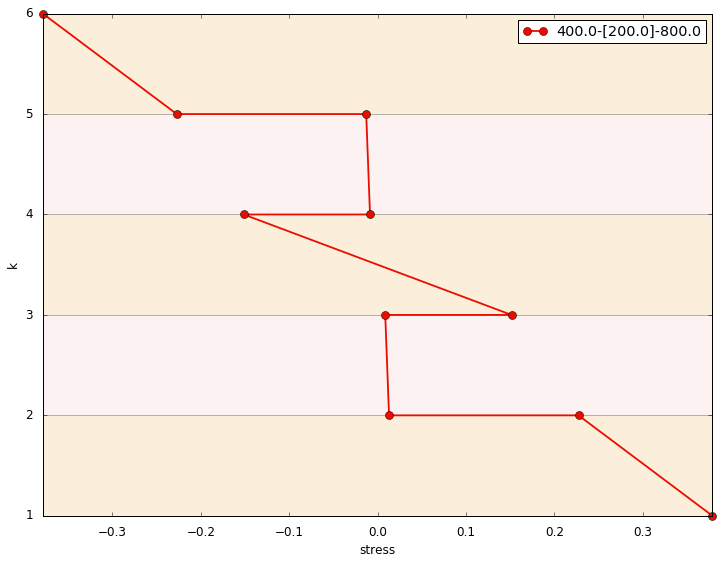

In [7]:
case1 = la.distributions.Case(load_params, mat_props)      # instantiate a User Input Case Object through distributions
case1.apply(['400-200-800'])
case1.plot()

That's it!  The rest of this demonstration showcases API functionality of the LamAna project.

## Calling Case attributes

Passed in arguments are acessible, but can be displayed as pandas Series and DataFrames.

In [8]:
# Original
case1.load_params

{'P_a': 1, 'R': 0.012, 'a': 0.0075, 'p': 5, 'r': 0.0002}

In [9]:
# Series View
case1.parameters

P_a    1.0000
R      0.0120
a      0.0075
p      5.0000
r      0.0002
dtype: float64

In [10]:
# Original
case1.mat_props

defaultdict(dict,
            {'Modulus': {'HA': 52000000000.0, 'PSu': 2700000000.0},
             'Poissons': {'HA': 0.25, 'PSu': 0.33}})

In [11]:
# DataFrame View
case1.properties

,Modulus,Poissons
materials,,
HA,5.2000e+10,0.25
PSu,2.7000e+09,0.33


In [12]:
# Equivalent Standard Form
case1.properties.to_dict()

{'Modulus': {'HA': 52000000000.0, 'PSu': 2700000000.0},
 'Poissons': {'HA': 0.25, 'PSu': 0.33000000000000002}}

Reset material order.  Changes are relfected in the properties view and stacking order.

In [13]:
case1.materials = ['PSu', 'HA']
case1.properties

,Modulus,Poissons
materials,,
PSu,2.7000e+09,0.33
HA,5.2000e+10,0.25


Serial resets

In [14]:
case1.materials = ['PSu', 'HA', 'HA']
case1.properties

,Modulus,Poissons
materials,,
PSu,2.7000e+09,0.33
HA,5.2000e+10,0.25


In [15]:
case1.materials                                          # get reorderd list of materials

['PSu', 'HA', 'HA']

In [16]:
case1._materials

['PSu', 'HA', 'HA']

In [17]:
case1.apply(geos_full) 

In [18]:
case1.snapshots[-1]

,layer,side,matl,type,t(um)
0,1,Tens.,PSu,outer,400.0
1,2,Tens.,HA,inner,100.0
2,3,Tens.,HA,inner,100.0
3,4,INDET,PSu,middle,800.0
4,5,Comp.,HA,inner,100.0
5,6,Comp.,HA,inner,100.0
6,7,Comp.,PSu,outer,400.0


In [19]:
'''Need to bypass pandas abc ordering of indicies.'''

'Need to bypass pandas abc ordering of indicies.'

Reset the parameters

In [20]:
mat_props2 = {'HA' : [5.3e10, 0.25],
              'PSu' : [2.8e9, 0.33],            
             }

In [21]:
case1 = la.distributions.Case(load_params, mat_props2) 
case1.properties

,Modulus,Poissons
materials,,
HA,5.3000e+10,0.25
PSu,2.8000e+09,0.33


## `apply()` Geometries and LaminateModels

Construct a laminate using geometric, matrial paramaters and geometries.

In [22]:
case2 = la.distributions.Case(load_params, mat_props) 
case2.apply(geos_full)                                     # default model Wilson_LT

Access the user input geometries

In [23]:
case2.Geometries                                           # using an attribute, __repr__

[Geometry object (0.0-[0.0]-2000.0),
 Geometry object (1000.0-[0.0]-0.0),
 Geometry object (600.0-[0.0]-800.0),
 Geometry object (500.0-[500.0]-0.0),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[200.0]-400.0S),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[100.0,100.0]-800.0),
 Geometry object (400.0-[100.0,100.0]-400.0S)]

In [24]:
print(case2.Geometries)                                    # uses __str__  

[Geometry object (0.0-[0.0]-2000.0), Geometry object (1000.0-[0.0]-0.0), Geometry object (600.0-[0.0]-800.0), Geometry object (500.0-[500.0]-0.0), Geometry object (400.0-[200.0]-800.0), Geometry object (400.0-[200.0]-400.0S), Geometry object (400.0-[200.0]-800.0), Geometry object (400.0-[100.0,100.0]-800.0), Geometry object (400.0-[100.0,100.0]-400.0S)]


In [25]:
case2.Geometries[0]                                        # indexing

Geometry object (0.0-[0.0]-2000.0)

We can compare Geometry objects with builtin Python operators.  This process  directly compares GeometryTuples in the `Geometry` class.

In [26]:
bilayer = case2.Geometries[1]                              # (1000.0-[0.0]-0.0)       
trilayer = case2.Geometries[2]                             # (600.0-[0.0]-800.0)        
#bilayer == trilayer
bilayer != trilayer

True

Get all thicknesses for selected layers.

In [27]:
case2.middle

[2000.0, 0.0, 800.0, 0.0, 800.0, 400.0, 800.0, 800.0, 400.0]

In [28]:
case2.inner

[[0.0],
 [0.0],
 [0.0],
 [500.0],
 [200.0],
 [200.0],
 [200.0],
 [100.0, 100.0],
 [100.0, 100.0]]

In [29]:
case2.inner[-1]

[100.0, 100.0]

In [30]:
case2.inner[-1][0]                                         # List indexing allowed  

100.0

In [31]:
[first[0] for first in case2.inner]                        # iterate  

[0.0, 0.0, 0.0, 500.0, 200.0, 200.0, 200.0, 100.0, 100.0]

In [32]:
case2.outer

[0.0, 1000.0, 600.0, 500.0, 400.0, 400.0, 400.0, 400.0, 400.0]

A general and very important object is the LaminateModel.

In [33]:
case2.LMs

[<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=5>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-400.0S), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-400.0S), p=5>]

Sometimes might you want to throw in a bunch of geometry strings from different groups.  If there are repeated strings in different groups (set intersections), you can tell `Case` to only give a unique result. 

For instane, here we combine two groups of geometry strings, 5-plys and odd-plys.  Clearly these two groups overlap, and there are some repeated geometries (one with different conventions).  Using the `unique` keyword, Case only operates on a unique set of `Geometry` objects (independent of convention), resulting in a unique set of LaminateModels. 

In [34]:
fiveplys = ['400-[200]-800', '350-400-500', '200-100-1400']
oddplys = ['400-200-800', '350-400-500', '400.0-[100.0,100.0]-800.0']
mix = fiveplys + oddplys
mix

['400-[200]-800',
 '350-400-500',
 '200-100-1400',
 '400-200-800',
 '350-400-500',
 '400.0-[100.0,100.0]-800.0']

In [35]:
# Non-unique, repeated 5-plys 
case_ = la.distributions.Case(load_params, mat_props) 
case_.apply(mix)
case_.LMs

[<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>,
 <lamana LaminateModel object (200.0-[100.0]-1400.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>]

In [36]:
# Unique 
case_ = la.distributions.Case(load_params, mat_props) 
case_.apply(mix, unique=True)
case_.LMs

[<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>,
 <lamana LaminateModel object (200.0-[100.0]-1400.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>]

## DataFrame Access

You can get a quick view of the stack using the `snapshot` method.  This gives access to a `Construct` - a DataFrame converted stack.

In [37]:
case2.snapshots[-1]

,layer,side,matl,type,t(um)
0,1,Tens.,HA,outer,400.0
1,2,Tens.,PSu,inner,100.0
2,3,Tens.,HA,inner,100.0
3,4,INDET,PSu,middle,800.0
4,5,Comp.,HA,inner,100.0
5,6,Comp.,PSu,inner,100.0
6,7,Comp.,HA,outer,400.0


We can easily view entire laminate DataFrames using the `frames` attribute.  This gives access to `LaminateModels` (DataFrame) objects, which extends the stack view so that laminate theory is applied to each row.

In [38]:
'''Consider head command for frames list'''

'Consider head command for frames list'

In [39]:
#case2.frames

In [40]:
##with pd.set_option('display.max_columns', None):           # display all columns, within this context manager 
##    case2.frames[5]

In [41]:
case2.frames[5].head()

,layer,side,type,matl,label,...,strain_r,strain_t,stress_r (Pa/N),stress_t (Pa/N),stress_f (MPa/N)
0,1,Tens.,outer,HA,interface,...,3.4519e-06,5.9651e-06,274182.8243,378730.6630,0.3787
1,1,Tens.,outer,HA,internal,...,3.1067e-06,5.3686e-06,246764.5419,340857.5967,0.3409
2,1,Tens.,outer,HA,internal,...,2.7615e-06,4.7721e-06,219346.2594,302984.5304,0.3030
3,1,Tens.,outer,HA,internal,...,2.4163e-06,4.1756e-06,191927.9770,265111.4641,0.2651
4,1,Tens.,outer,HA,discont.,...,2.0712e-06,3.5791e-06,164509.6946,227238.3978,0.2272


In [42]:
'''Extend laminate attributes'''

'Extend laminate attributes'

In [43]:
case3 = la.distributions.Case(load_params, mat_props) 
case3.apply(geos_dissimilar)
#case3.frames

NOTE, for even plies, the material is set alternate for each layer.  Thus outers layers may be different materials.

In [44]:
case4 = la.distributions.Case(load_params, mat_props) 
case4.apply(['400-[100,100,100]-0'])
case4.frames[0][['layer', 'matl', 'type']]
;

''

In [45]:
'''Add functionality to customize material type.'''

'Add functionality to customize material type.'

### Totaling

The `distributions.Case` class has useful properties available for totaling specific layers for a group of laminates as lists.  As these properties return lists, these results can be **sliced** and **iterated**.

In [46]:
'''Show Geometry first then case use.'''

'Show Geometry first then case use.'

###### `.total` property

In [47]:
case2.total

[2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0, 2000.0]

In [48]:
case2.total_middle

[2000.0, 0.0, 800.0, 0.0, 800.0, 800.0, 800.0, 800.0, 800.0]

In [49]:
case2.total_middle

[2000.0, 0.0, 800.0, 0.0, 800.0, 800.0, 800.0, 800.0, 800.0]

In [50]:
case2.total_inner_i

[[0.0],
 [0.0],
 [0.0],
 [1000.0],
 [400.0],
 [400.0],
 [400.0],
 [200.0, 200.0],
 [200.0, 200.0]]

In [51]:
case2.total_outer

[0.0, 2000.0, 1200.0, 1000.0, 800.0, 800.0, 800.0, 800.0, 800.0]

In [52]:
case2.total_outer[4:-1]                                    # slicing   

[800.0, 800.0, 800.0, 800.0]

In [53]:
[inner_i[-1]/2.0 for inner_i in case2.total_inner_i]       # iterate                                                                               

[0.0, 0.0, 0.0, 500.0, 200.0, 200.0, 200.0, 100.0, 100.0]

###### `Geometry` Totals

The total attribute used in Case actually dervive from attributes for Geometry objects individually.  On Geometry objects, they return specific thicknesses instead of lists of thicknesses.

In [54]:
G1 = case2.Geometries[-1]
G1

Geometry object (400.0-[100.0,100.0]-400.0S)

In [55]:
G1.total                                                   # laminate thickness (um)

2000.0

In [56]:
G1.total_inner_i                                           # inner_i laminae

[200.0, 200.0]

In [57]:
G1.total_inner_i[0]                                        # inner_i lamina pair

200.0

In [58]:
sum(G1.total_inner_i)                                      # inner total

400.0

In [59]:
G1.total_inner                                             # inner total

400.0

## `LaminateModel` Attributes

Access the LaminateModel object directly using the `LMs` attribute.

In [60]:
case2.LMs[5].Middle

,layer,side,type,matl,label,...,strain_r,strain_t,stress_r (Pa/N),stress_t (Pa/N),stress_f (MPa/N)
10,3,Tens.,middle,HA,interface,...,1.3808e-06,2.3860e-06,109673.1297,151492.2652,0.1515
11,3,Tens.,middle,HA,internal,...,6.9039e-07,1.1930e-06,54836.5649,75746.1326,0.0757
12,3,None,middle,HA,neut. axis,...,0.0000e+00,0.0000e+00,0.0000,0.0000,0.0000
13,3,Comp.,middle,HA,internal,...,-6.9039e-07,-1.1930e-06,-54836.5649,-75746.1326,-0.0757
14,3,Comp.,middle,HA,interface,...,-1.3808e-06,-2.3860e-06,-109673.1297,-151492.2652,-0.1515


In [61]:
case2.LMs[5].Inner_i

,layer,side,type,matl,label,...,strain_r,strain_t,stress_r (Pa/N),stress_t (Pa/N),stress_f (MPa/N)
5,2,Tens.,inner,PSu,interface,...,2.0712e-06,3.5791e-06,9854.1805,12915.3340,0.0129
6,2,Tens.,inner,PSu,internal,...,1.8986e-06,3.2808e-06,9032.9988,11839.0562,0.0118
7,2,Tens.,inner,PSu,internal,...,1.7260e-06,2.9825e-06,8211.8171,10762.7783,0.0108
8,2,Tens.,inner,PSu,internal,...,1.5534e-06,2.6843e-06,7390.6354,9686.5005,0.0097
9,2,Tens.,inner,PSu,discont.,...,1.3808e-06,2.3860e-06,6569.4537,8610.2227,0.0086
15,4,Comp.,inner,PSu,discont.,...,-1.3808e-06,-2.3860e-06,-6569.4537,-8610.2227,-0.0086
16,4,Comp.,inner,PSu,internal,...,-1.5534e-06,-2.6843e-06,-7390.6354,-9686.5005,-0.0097
17,4,Comp.,inner,PSu,internal,...,-1.7260e-06,-2.9825e-06,-8211.8171,-10762.7783,-0.0108
18,4,Comp.,inner,PSu,internal,...,-1.8986e-06,-3.2808e-06,-9032.9988,-11839.0562,-0.0118
19,4,Comp.,inner,PSu,interface,...,-2.0712e-06,-3.5791e-06,-9854.1805,-12915.3340,-0.0129


Laminates are assumed mirrored at the neutral axis, but dissimilar inner_i thicknesses are allowed.

In [62]:
case2.LMs[5].tensile

,layer,side,type,matl,label,...,strain_r,strain_t,stress_r (Pa/N),stress_t (Pa/N),stress_f (MPa/N)
0,1,Tens.,outer,HA,interface,...,3.4519e-06,5.9651e-06,274182.8243,378730.6630,0.3787
1,1,Tens.,outer,HA,internal,...,3.1067e-06,5.3686e-06,246764.5419,340857.5967,0.3409
2,1,Tens.,outer,HA,internal,...,2.7615e-06,4.7721e-06,219346.2594,302984.5304,0.3030
3,1,Tens.,outer,HA,internal,...,2.4163e-06,4.1756e-06,191927.9770,265111.4641,0.2651
4,1,Tens.,outer,HA,discont.,...,2.0712e-06,3.5791e-06,164509.6946,227238.3978,0.2272
5,2,Tens.,inner,PSu,interface,...,2.0712e-06,3.5791e-06,9854.1805,12915.3340,0.0129
6,2,Tens.,inner,PSu,internal,...,1.8986e-06,3.2808e-06,9032.9988,11839.0562,0.0118
7,2,Tens.,inner,PSu,internal,...,1.7260e-06,2.9825e-06,8211.8171,10762.7783,0.0108
8,2,Tens.,inner,PSu,internal,...,1.5534e-06,2.6843e-06,7390.6354,9686.5005,0.0097
9,2,Tens.,inner,PSu,discont.,...,1.3808e-06,2.3860e-06,6569.4537,8610.2227,0.0086


Separate from the case attributes, Laminates have useful attributes also, such as `nplies`, `p` and its own `total`.

In [63]:
LM = case2.LMs[4]
LM.LMFrame.tail(7)

,layer,side,type,matl,label,...,strain_r,strain_t,stress_r (Pa/N),stress_t (Pa/N),stress_f (MPa/N)
18,4,Comp.,inner,PSu,internal,...,-1.8986e-06,-3.2808e-06,-9032.9988,-11839.0562,-0.0118
19,4,Comp.,inner,PSu,interface,...,-2.0712e-06,-3.5791e-06,-9854.1805,-12915.3340,-0.0129
20,5,Comp.,outer,HA,discont.,...,-2.0712e-06,-3.5791e-06,-164509.6946,-227238.3978,-0.2272
21,5,Comp.,outer,HA,internal,...,-2.4163e-06,-4.1756e-06,-191927.9770,-265111.4641,-0.2651
22,5,Comp.,outer,HA,internal,...,-2.7615e-06,-4.7721e-06,-219346.2594,-302984.5304,-0.3030
23,5,Comp.,outer,HA,internal,...,-3.1067e-06,-5.3686e-06,-246764.5419,-340857.5967,-0.3409
24,5,Comp.,outer,HA,interface,...,-3.4519e-06,-5.9651e-06,-274182.8243,-378730.6630,-0.3787


Often the extreme stress values (those at the interfaces) are most important.  This is equivalent to p=2.

In [64]:
LM.extrema

,layer,side,type,matl,label,...,strain_r,strain_t,stress_r (Pa/N),stress_t (Pa/N),stress_f (MPa/N)
0,1,Tens.,outer,HA,interface,...,3.4519e-06,5.9651e-06,274182.8243,378730.6630,0.3787
4,1,Tens.,outer,HA,discont.,...,2.0712e-06,3.5791e-06,164509.6946,227238.3978,0.2272
5,2,Tens.,inner,PSu,interface,...,2.0712e-06,3.5791e-06,9854.1805,12915.3340,0.0129
9,2,Tens.,inner,PSu,discont.,...,1.3808e-06,2.3860e-06,6569.4537,8610.2227,0.0086
10,3,Tens.,middle,HA,interface,...,1.3808e-06,2.3860e-06,109673.1297,151492.2652,0.1515
14,3,Comp.,middle,HA,interface,...,-1.3808e-06,-2.3860e-06,-109673.1297,-151492.2652,-0.1515
15,4,Comp.,inner,PSu,discont.,...,-1.3808e-06,-2.3860e-06,-6569.4537,-8610.2227,-0.0086
19,4,Comp.,inner,PSu,interface,...,-2.0712e-06,-3.5791e-06,-9854.1805,-12915.3340,-0.0129
20,5,Comp.,outer,HA,discont.,...,-2.0712e-06,-3.5791e-06,-164509.6946,-227238.3978,-0.2272
24,5,Comp.,outer,HA,interface,...,-3.4519e-06,-5.9651e-06,-274182.8243,-378730.6630,-0.3787


In [65]:
LM.p                                                       # number of rows per group

5

In [66]:
LM.nplies                                                  # number of plies

5

In [67]:
LM.total                                                   # total laminate thickness (m)

0.002

In [68]:
LM.Geometry

Geometry object (400.0-[200.0]-800.0)

In [69]:
'''Overload the min and max special methods.'''

'Overload the min and max special methods.'

In [70]:
LM.max_stress                                             # max interfacial failure stress

0     0.3787
5     0.0129
10    0.1515
14   -0.1515
19   -0.0129
24   -0.3787
Name: stress_f (MPa/N), dtype: float64

NOTE: this feature gives a different result for p=1 since a single middle cannot report two interfacial values; INDET.

In [71]:
LM.min_stress 

4     0.2272
9     0.0086
15   -0.0086
20   -0.2272
Name: stress_f (MPa/N), dtype: float64

In [72]:
'''Redo tp return series of bool an index for has_attrs'''

'Redo tp return series of bool an index for has_attrs'

In [73]:
LM.has_neutaxis

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: label, dtype: bool

In [74]:
LM.has_discont

0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
20     True
21    False
22    False
23    False
24    False
Name: label, dtype: bool

In [75]:
LM.is_special

False

In [76]:
LM.FeatureInput

{'Geometry': Geometry object (400.0-[200.0]-800.0),
 'Globals': {'D_11T': 31.664191802890315,
  'D_11p': 0.033700807714524279,
  'D_12T': 7.9406108505093584,
  'D_12n': -0.0084513446948124519,
  'K_r': 0.0034519261262397653,
  'K_t:': 0.0059650953251038216,
  'M_r': 0.15666895161350616,
  'M_t': 0.216290324549788,
  'v_eq ': 0.25077573114575868},
 'Materials': ['HA', 'PSu'],
 'Model': 'Wilson_LT',
 'Parameters': {'P_a': 1, 'R': 0.012, 'a': 0.0075, 'p': 5, 'r': 0.0002},
 'Properties': defaultdict(dict,
             {'Modulus': {'HA': 52000000000.0, 'PSu': 2700000000.0},
              'Poissons': {'HA': 0.25, 'PSu': 0.33}})}

In [77]:
'''Need to fix FeatureInput and Geometry inside LaminateModel'''

'Need to fix FeatureInput and Geometry inside LaminateModel'

As with Geometry objects, we can compare LaminateModel objects also.  ~~This process directly compares two defining components of a LaminateModel object: the LM DataFrame (`LMFrame`) and FeatureInput.  If either is False, the equality returns `False`.~~

In [78]:
case2 = la.distributions.Case(load_params, mat_props) 
case2.apply(geos_full) 

In [79]:
bilayer_LM = case2.LMs[1]
trilayer_LM = case2.LMs[2]
trilayer_LM == trilayer_LM
#bilayer_LM == trilayer_LM

True

In [80]:
bilayer_LM != trilayer_LM

True

Use python and pandas native comparison tracebacks that to understand the errors directly by comparing FeatureInput dict and LaminateModel DataFrame.

In [81]:
#bilayer_LM.FeatureInput == trilayer_LM.FeatureInput    # gives detailed traceback

In [82]:
'''Fix FI DataFrame with dict.'''

'Fix FI DataFrame with dict.'

In [83]:
bilayer_LM.FeatureInput

{'Geometry': Geometry object (1000.0-[0.0]-0.0),
 'Globals': {'D_11T': 19.498876544595319,
  'D_11p': 0.054826177209184083,
  'D_12T': 4.9555181486053437,
  'D_12n': -0.013933731800259629,
  'K_r': 0.0055968142719747937,
  'K_t:': 0.009677945375294943,
  'M_r': 0.15709082448075087,
  'M_t': 0.21644417677735781,
  'v_eq ': 0.25414377783621128},
 'Materials': ['HA', 'PSu'],
 'Model': 'Wilson_LT',
 'Parameters': {'P_a': 1, 'R': 0.012, 'a': 0.0075, 'p': 5, 'r': 0.0002},
 'Properties': defaultdict(dict,
             {'Modulus': {'HA': 52000000000.0, 'PSu': 2700000000.0},
              'Poissons': {'HA': 0.25, 'PSu': 0.33}})}

In [84]:
#bilayer_LM.LMFrame == trilayer_LM.LMFrame                # gives detailed traceback

## `plot()` LT Geometries

CAVEAT: it is recommended to use at least p=2 for calculating stress. Less than two points for odd plies is indeterminant in middle rows, which can raise exceptions.

In [85]:
'''Find a way to remove all but interfacial points.'''

'Find a way to remove all but interfacial points.'

We try to quickly plot simple stress distriubtions with native pandas methods. We have two variants for displaying distributions:

    - Unnoormalized: plotted by the height (`d_`). Visaully: thicknesses vary, material slopes are constant. 
    - Normalized: plotted by the relative fraction level (`k_`). Visually: thicknesses are constant, material slopes vary.
    
Here we plot with the nbagg matplotlib backend to generatre interactive figures.  NOTE: for Normalized plots, slope can vary for a given material. 

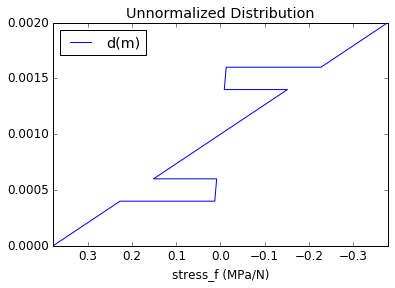

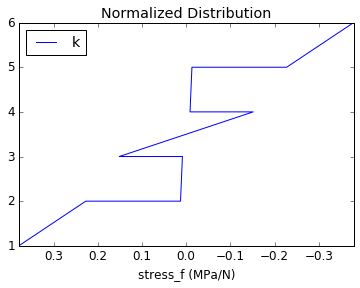

In [86]:
from lamana.utils import tools as ut
from lamana.models import Wilson_LT as wlt

dft = wlt.Defaults()
#%matplotlib nbagg

# Quick plotting
case4 = ut.laminator(dft.geos_standard)
for case in case4.values():
    for LM in case.LMs:
        df = LM.LMFrame
        
df.plot(x='stress_f (MPa/N)', y='d(m)', title='Unnormalized Distribution')
df.plot(x='stress_f (MPa/N)', y='k', title='Normalized Distribution')

While we get reasonable stress distribution plots rather simply, LamAna offers some plotting methods pertinent to laminates than assisting with visualization.

Demo - An example illustration of desired plotting of multiple geometries from `distributions`.

![demo](./_images/demo_plot.png)

This is image of results from legacy code used for comparison.

We can plot the stress distribution for a case of a single geometry.

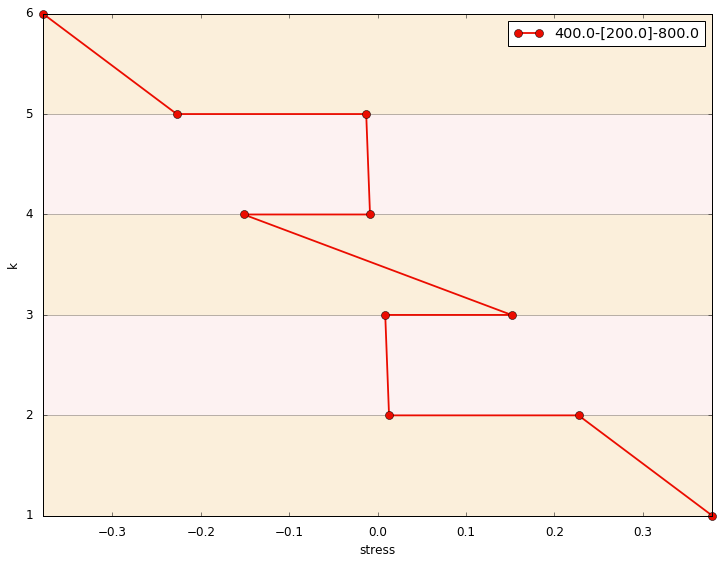

In [87]:
case3 = la.distributions.Case(load_params, mat_props) 
case3.apply(['400-200-800'], model='Wilson_LT')
case3.plot()

We can also plot multiple geometries of similar total thickness.

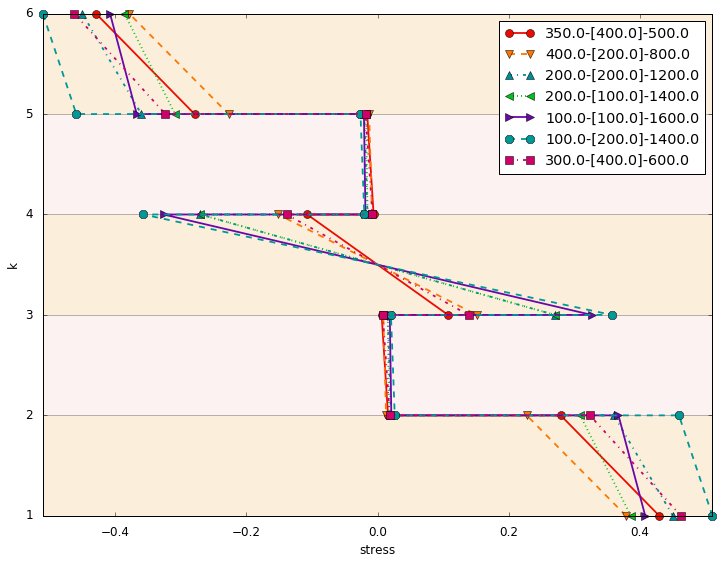

In [88]:
five_plies = ['350-400-500',  '400-200-800', '200-200-1200', '200-100-1400',
              '100-100-1600', '100-200-1400', '300-400-600']

case4 = la.distributions.Case(load_params, mat_props) 
case4.apply(five_plies, model='Wilson_LT')
case4.plot()

In [89]:
'''If different plies or patterns, make new caselet (subplot)'''
'''[400-200-800, '300-[400,200]-600']            # non-congruent? equi-ply'''
'''[400-200-800, '400-200-0']                    # odd/even ply'''
# currently superimposes plots.  Just needs to separate.

"[400-200-800, '400-200-0']                    # odd/even ply"

## Exporting

Saving data is critical for future analysis.  LamAna offers two formas for exporting your data and parameters.  Parameters used to make calculations such as the FeatureInput information are saved as "dashboards" in different forms.
- '.xlsx': (default); convient for storing multiple calculationa amd dashboards as se[arate worksheets in a Excel workbook.
- '.csv': universal format; separate files for data and dashboard.

The lowest level to export data is for a LaminateModel object.

In [90]:
LM = case4.LMs[0]
LM.to_xlsx(delete=True)                         # or `to_csv()`

('c:\\users\\p\\desktop\\lamana-rebase\\export\\laminatemodel_5ply_p5_t2.0_350.0-[400.0]-500.0.xlsx',)

<div class="alert alert-warning">**NOTE** For demonstration purposes, the `temp` and `delete` are activated.  This will create temporary files in the OS temp directory and automatically delete them.  For practical use, ignore setting these flags.</div>

The latter LaminateModel data was saved to an .xlsx file in the default export folder.  The filepath is returned (currently suppressed with the `;` line).  

The next level to export data is for a case.  This will save all files comprise in a case.  If exported to csv format, files are saved seperately.  In xlsx format, a single file is made where each LaminateModel data and dashboard are saved as seperate worksheets.

In [91]:
case4.to_xlsx(temp=True, delete=True)           # or `to_csv()`

'C:\\Users\\P\\AppData\\Local\\Temp\\t_case_LaminateModels(2).xlsx'

---

# Tutorial: Intermediate

So far, the barebones objects have been discussed and a lot can be accomplished with the basics.  For users who have some experience with Python and Pandas, here are some intermediate techniques to reduce repetitious actions.

This section dicusses the use of abstract base classes intended for reducing redundant tasks such as **multiple case creation** and **default parameter definitions**.  Custom model subclassing is also discussed.

In [92]:
#------------------------------------------------------------------------------
import pandas as pd

import lamana as la

%matplotlib inline
#%matplotlib nbagg
# PARAMETERS ------------------------------------------------------------------
# Build dicts of loading parameters and and material properties
load_params = {'R' : 12e-3,                                # specimen radius
               'a' : 7.5e-3,                               # support ring radius
               'r' : 2e-4,                                 # radial distance from center loading
               'P_a' : 1,                                  # applied load
               'p' : 5,                                    # points/layer
               }

# # Quick Form: a dict of lists
# mat_props = {'HA' : [5.2e10, 0.25],
#              'PSu' : [2.7e9, 0.33],}

# Standard Form: a dict of dicts
mat_props = {'Modulus': {'HA': 5.2e10, 'PSu': 2.7e9},
             'Poissons': {'HA': 0.25, 'PSu': 0.33}}


# What geometries to test?
# Make tuples of desired geometeries to analyze: outer - {inner...-....}_i - middle

# Current Style
g1 = ('0-0-2000')                                          # Monolith
g2 = ('1000-0-0')                                          # Bilayer
g3 = ('600-0-800')                                         # Trilayer
g4 = ('500-500-0')                                         # 4-ply
g5 = ('400-200-800')                                       # Short-hand; <= 5-ply
g6 = ('400-200-400S')                                      # Symmetric
g7 = ('400-[200]-800')                                     # General convention; 5-ply 
g8 = ('400-[100,100]-800')                                 # General convention; 7-plys 
g9 = ('400-[100,100]-400S')                                # General and Symmetric convention; 7-plys 

'''Add to test set'''
g13 = ('400-[150,50]-800')                                 # Dissimilar inner_is     
g14 = ('400-[25,125,50]-800')                         


geos_most = [g1, g2, g3, g4, g5]
geos_special = [g6, g7, g8, g9]
geos_full = [g1, g2, g3, g4, g5, g6, g7, g8, g9]
geos_dissimilar = [g13, g14]

## Exploring LamAna Objects

This is brief introduction to underlying objects in this package.  We begin with an input string that is parsed and converted into a Geometry object.  This is part of the `input_` module.

In [93]:
# Geometry object
la.input_.Geometry('100-200-1600')

Geometry object (100.0-[200.0]-1600.0)

This object has a number of handy methods. This information is shipped with parameters and properties in `FeatureInput`.  A `FeatureInput` is simply a dict.  This currently does have not an official class but is it import for other objects.

In [94]:
# FeatureInput 
FI = {
    'Geometry': la.input_.Geometry('400.0-[200.0]-800.0'),
    'Materials': ['HA', 'PSu'],
    'Model': 'Wilson_LT',
    'Parameters': load_params,
    'Properties': mat_props,
    'Globals': None,
}

The following objects are serially inherited and part of the `constructs` module.  These construct the DataFrame represention of a laminate.  The code to decouple LaminateModel from Laminate was merged in verions 0.4.13.

In [95]:
# Stack object
la.constructs.Stack(FI)

In [96]:
# Laminate object
la.constructs.Laminate(FI)

<lamana Laminate object (400.0-[200.0]-800.0), p=5>

In [97]:
# LaminateModel object
la.constructs.LaminateModel(FI)

<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>

The latter cells verify these objects are successfully decoupled.  That's all for now.

## Generating Multiple Cases

We've already seen we can [generate a case object and plots with three lines of code](#Goal:-Generate-a-Plot-in-3-Lines-of-Code).  However, sometimes it is necessary to generate different cases. These invocations can be tedious with three lines of code per case.  Have no fear.  A simple way to produce more cases is to instantiate a `Cases` object. 

Below we will create a `Cases` which houses multiples cases that:
- share similiar loading parameters/material properties and laminate theory model with
- different numbers of datapoints, p 

In [98]:
cases1 = la.distributions.Cases(['400-200-800', '350-400-500', 
                                 '400-200-0', '1000-0-0'],
                                load_params=load_params,
                                mat_props=mat_props, model= 'Wilson_LT',
                                ps=[3,4,5]) 
cases1

<lamana.distributions.Cases object at 0x0000020227E4C518>, {0: <<class 'lamana.distributions.Case'> p=3, size=1>, 1: <<class 'lamana.distributions.Case'> p=3, size=1>, 2: <<class 'lamana.distributions.Case'> p=3, size=1>, 3: <<class 'lamana.distributions.Case'> p=3, size=1>, 4: <<class 'lamana.distributions.Case'> p=4, size=1>, 5: <<class 'lamana.distributions.Case'> p=4, size=1>, 6: <<class 'lamana.distributions.Case'> p=4, size=1>, 7: <<class 'lamana.distributions.Case'> p=4, size=1>, 8: <<class 'lamana.distributions.Case'> p=5, size=1>, 9: <<class 'lamana.distributions.Case'> p=5, size=1>, 10: <<class 'lamana.distributions.Case'> p=5, size=1>, 11: <<class 'lamana.distributions.Case'> p=5, size=1>}

`Cases()` accepts a list of geometry strings. Given appropriate default keywords, this lone argument will return a dict-like object of cases with indicies as keys. The `model` and `ps` keywords have default values.

A `Cases()` object has some interesting characteristics (this is not a dict):

- if user-defined, tries to import `Defaults()` to simplify instantiations
- dict-like storage and access of cases
- list-like ordering of cases
- gettable: list-like, get items by index (including negative indicies)
- sliceable: slices the dict keys of the Cases object
- viewable: contained LaminateModels
- iterable: by values (unlike normal dicts, not by keys)
- writable: write DataFrames to csv files
- selectable: perform set operations and return unique subsets

In [99]:
# Gettable

cases1[0]                                                 # normal dict key selection 
cases1[-1]                                                # negative indices 
cases1[-2]                                                # negative indicies 

<<class 'lamana.distributions.Case'> p=5, size=1>

In [100]:
# Sliceable

cases1[0:2]                                               # range of dict keys
cases1[0:3]                                               # full range of dict keys
cases1[:]                                                 # full range
cases1[1:]                                                # start:None
cases1[:2]                                                # None:stop
cases1[:-1]                                               # None:negative index
cases1[:-2]                                               # None:negative index
#cases1[0:-1:-2]                                           # start:stop:step; NotImplemented
#cases1[::-1]                                              # reverse; NotImplemented

[<<class 'lamana.distributions.Case'> p=3, size=1>,
 <<class 'lamana.distributions.Case'> p=3, size=1>,
 <<class 'lamana.distributions.Case'> p=3, size=1>,
 <<class 'lamana.distributions.Case'> p=3, size=1>,
 <<class 'lamana.distributions.Case'> p=4, size=1>,
 <<class 'lamana.distributions.Case'> p=4, size=1>,
 <<class 'lamana.distributions.Case'> p=4, size=1>,
 <<class 'lamana.distributions.Case'> p=4, size=1>,
 <<class 'lamana.distributions.Case'> p=5, size=1>,
 <<class 'lamana.distributions.Case'> p=5, size=1>]

In [101]:
# Viewable
cases1
cases1.LMs

[<lamana LaminateModel object (400.0-[200.0]-800.0), p=3>,
 <lamana LaminateModel object (350.0-[400.0]-500.0), p=3>,
 <lamana LaminateModel object (400.0-[200.0]-0.0), p=3>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=4>,
 <lamana LaminateModel object (350.0-[400.0]-500.0), p=4>,
 <lamana LaminateModel object (400.0-[200.0]-0.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-0.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>]

In [102]:
# Iterable
for i, case in enumerate(cases1):                         # __iter__ values
    print(case)
    #print(case.LMs)                                      # access LaminateModels

<<class 'lamana.distributions.Case'> p=3>
<<class 'lamana.distributions.Case'> p=3>
<<class 'lamana.distributions.Case'> p=3>
<<class 'lamana.distributions.Case'> p=3>
<<class 'lamana.distributions.Case'> p=4>
<<class 'lamana.distributions.Case'> p=4>
<<class 'lamana.distributions.Case'> p=4>
<<class 'lamana.distributions.Case'> p=4>
<<class 'lamana.distributions.Case'> p=5>
<<class 'lamana.distributions.Case'> p=5>
<<class 'lamana.distributions.Case'> p=5>
<<class 'lamana.distributions.Case'> p=5>


In [103]:
# Writable
#cases1.to_csv()                                          # write to file

In [104]:
# Selectable
cases1.select(nplies=[2,4])                               # by # plies
cases1.select(ps=[3,4])                                   # by points/DataFrame rows
cases1.select(nplies=[2,4], ps=[3,4], how='intersection') # by set operations 

{<lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>,
 <lamana LaminateModel object (400.0-[200.0]-0.0), p=3>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (400.0-[200.0]-0.0), p=4>}

LamainateModels can be compared using set theory.  Unique subsets of LaminateModels can  be returned from a mix of repeated  geometry strings.  We will use the default `model` and `ps` values.

In [105]:
set(geos_most).issubset(geos_full)                        # confirm repeated items

True

In [106]:
mix = geos_full + geos_most                               # contains repeated items

In [107]:
# Repeated Subset
cases2 = la.distributions.Cases(mix, load_params=load_params, mat_props=mat_props) 
cases2.LMs

[<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=5>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-400.0S), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-400.0S), p=5>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=5>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>]

In [108]:
# Unique Subset
cases2 = la.distributions.Cases(mix, load_params=load_params, mat_props=mat_props,
                                unique=True) 
cases2.LMs

[<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=5>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-400.0S), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[100.0,100.0]-400.0S), p=5>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=5>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>]

## Subclassing Custom Default Parameters

We observed the benefits of using *implicit*, default keywords (`models`, `ps`) in simplifying the writing of `Cases()` instantiations.  In general, the user can code *explicit* defaults for `load_params` and `mat_props` by subclassing `BaseDefaults()` from `inputs_`.  While subclassing requires some extra Python knowledge, this is a relatively simple process that reduces a significant amount of redundant code, leading to a more effiencient anaytical setting. 

The `BaseDefaults` contains a dict various geometry strings and Geometry objects.  Rather than defining examples for various geometry plies, the user can call from all or a groupings of geometries.

In [109]:
from lamana.input_ import BaseDefaults

bdft = BaseDefaults()

# geometry String Attributes
bdft.geo_inputs                                           # all dict key-values
bdft.geos_all                                             # all geo strings
bdft.geos_standard                                        # static
bdft.geos_sample                                          # active; grows

# Geometry Object Attributes; mimics latter
bdft.Geo_objects                                          # all dict key-values
bdft.Geos_all                                             # all Geo objects
# more ...

# Custom FeatureInputs
#bdft.get_FeatureInput()                                   # quick builds  
#bdft.get_materials()                                      # convert to std. form

[Geometry object (0.0-[0.0]-2000.0),
 Geometry object (0.0-[0.0]-1000.0),
 Geometry object (1000.0-[0.0]-0.0),
 Geometry object (600.0-[0.0]-800.0),
 Geometry object (600.0-[0.0]-400.0S),
 Geometry object (500.0-[500.0]-0.0),
 Geometry object (400.0-[200.0]-0.0),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[200.0]-400.0S),
 Geometry object (400.0-[100.0,100.0]-0.0),
 Geometry object (500.0-[250.0,250.0]-0.0),
 Geometry object (400.0-[100.0,100.0]-800.0),
 Geometry object (400.0-[100.0,100.0]-400.0S),
 Geometry object (400.0-[100.0,100.0,100.0]-800.0),
 Geometry object (500.0-[50.0,50.0,50.0,50.0]-0.0),
 Geometry object (400.0-[100.0,100.0,100.0,100.0]-800.0),
 Geometry object (400.0-[100.0,100.0,100.0,100.0,100.0]-800.0)]

The latter geometric defaults come out of the box when subclassed from `BaseDefaults`.  If custom geometries are desired, the user can override the `geo_inputs` dict, which automatically builds the `Geo_objects` dict.

Users can override three categories of defaults parameters:

1. geometric variables
1. loading parameters
1. material properties

As mentioned, some geometric variables are provided for general laminate dimensions.  The other parameters cannot be predicted and need to be defined by the user. Below is an example of a Defaults() subclass.  If a custom model has been implemented (see next section), it is convention to place `Defaults()` and all other custom code within this module.  If a custom model is implemented an located in the models directory, Cases will automatically search will the designated model modules, locate the `load_params` and `mat_props` attributes and load them automatically for all `Cases` instantiations.

In [110]:
# Example Defaults from LamAna.models.Wilson_LT
class Defaults(BaseDefaults):
    '''Return parameters for building distributions cases.  Useful for consistent 
    testing.
    
    Dimensional defaults are inheirited from utils.BaseDefaults().  
    Material-specific parameters are defined here by he user.
    
    - Default geometric and materials parameters
    - Default FeatureInputs
    
    Examples
    ========
    >>>dft = Defaults()
    >>>dft.load_params
    {'R' : 12e-3, 'a' : 7.5e-3, 'p' : 1, 'P_a' : 1, 'r' : 2e-4,}
    
    >>>dft.mat_props
    {'Modulus': {'HA': 5.2e10, 'PSu': 2.7e9},
    'Poissons': {'HA': 0.25, 'PSu': 0.33}}
    
    >>>dft.FeatureInput
     {'Geometry' : '400-[200]-800',
      'Geometric' : {'R' : 12e-3, 'a' : 7.5e-3, 'p' : 1, 'P_a' : 1, 'r' : 2e-4,},
      'Materials' : {'HA' : [5.2e10, 0.25], 'PSu' : [2.7e9, 0.33],},
      'Custom' : None,
      'Model' : Wilson_LT,
     }

    '''
    def __init__(self):
        BaseDefaults.__init__(self)
        '''DEV: Add defaults first.  Then adjust attributes.'''
        # DEFAULTS ------------------------------------------------------------
        # Build dicts of geometric and material parameters
        self.load_params = {'R' : 12e-3,                   # specimen radius
                            'a' : 7.5e-3,                  # support ring radius
                            'p' : 5,                       # points/layer
                            'P_a' : 1,                     # applied load 
                            'r' : 2e-4,                    # radial distance from center loading
                            }

        self.mat_props = {'Modulus': {'HA': 5.2e10, 'PSu': 2.7e9},
                           'Poissons': {'HA': 0.25, 'PSu': 0.33}}
        
        # ATTRIBUTES ----------------------------------------------------------                
        # FeatureInput
        self.FeatureInput = self.get_FeatureInput(self.Geo_objects['standard'][0], 
                                             load_params=self.load_params,
                                             mat_props=self.mat_props,
                                             ##custom_matls=None,
                                             model='Wilson_LT',
                                             global_vars=None)    

In [111]:
'''Use Classic_LT here'''

'Use Classic_LT here'

In [112]:
from lamana.distributions import Cases
# Auto load_params and mat_params

dft = Defaults()
cases3 = Cases(dft.geos_full, model='Wilson_LT')
#cases3 = la.distributions.Cases(dft.geos_full, model='Wilson_LT')
cases3

<lamana.distributions.Cases object at 0x00000202284D7E80>, {0: <<class 'lamana.distributions.Case'> p=5, size=1>, 1: <<class 'lamana.distributions.Case'> p=5, size=1>, 2: <<class 'lamana.distributions.Case'> p=5, size=1>, 3: <<class 'lamana.distributions.Case'> p=5, size=1>, 4: <<class 'lamana.distributions.Case'> p=5, size=1>, 5: <<class 'lamana.distributions.Case'> p=5, size=1>, 6: <<class 'lamana.distributions.Case'> p=5, size=1>, 7: <<class 'lamana.distributions.Case'> p=5, size=1>}

In [113]:
'''Refine idiom for importing Cases '''

'Refine idiom for importing Cases '

## Subclassing Custom Models

One of the most powerful feauteres of LamAna is the ability to define customized modifications to the Laminate Theory models.

Code for laminate theories (i.e. Classic_LT, Wilson_LT) are are located in the models directory.  These models can be simple functions or sublclass from `BaseModels` in the `theories` module.  Either approach is acceptable (see narrative docs for more details on creating custom models.

This ability to add custom code make this library extensibile to use a larger variety of models.

## Plotting Cases

An example of multiple subplots is show below.  Using a former case, notice each subplot is indepent, woth separate geometries for each.  LamAna treats each subplot as a subset or "caselet":

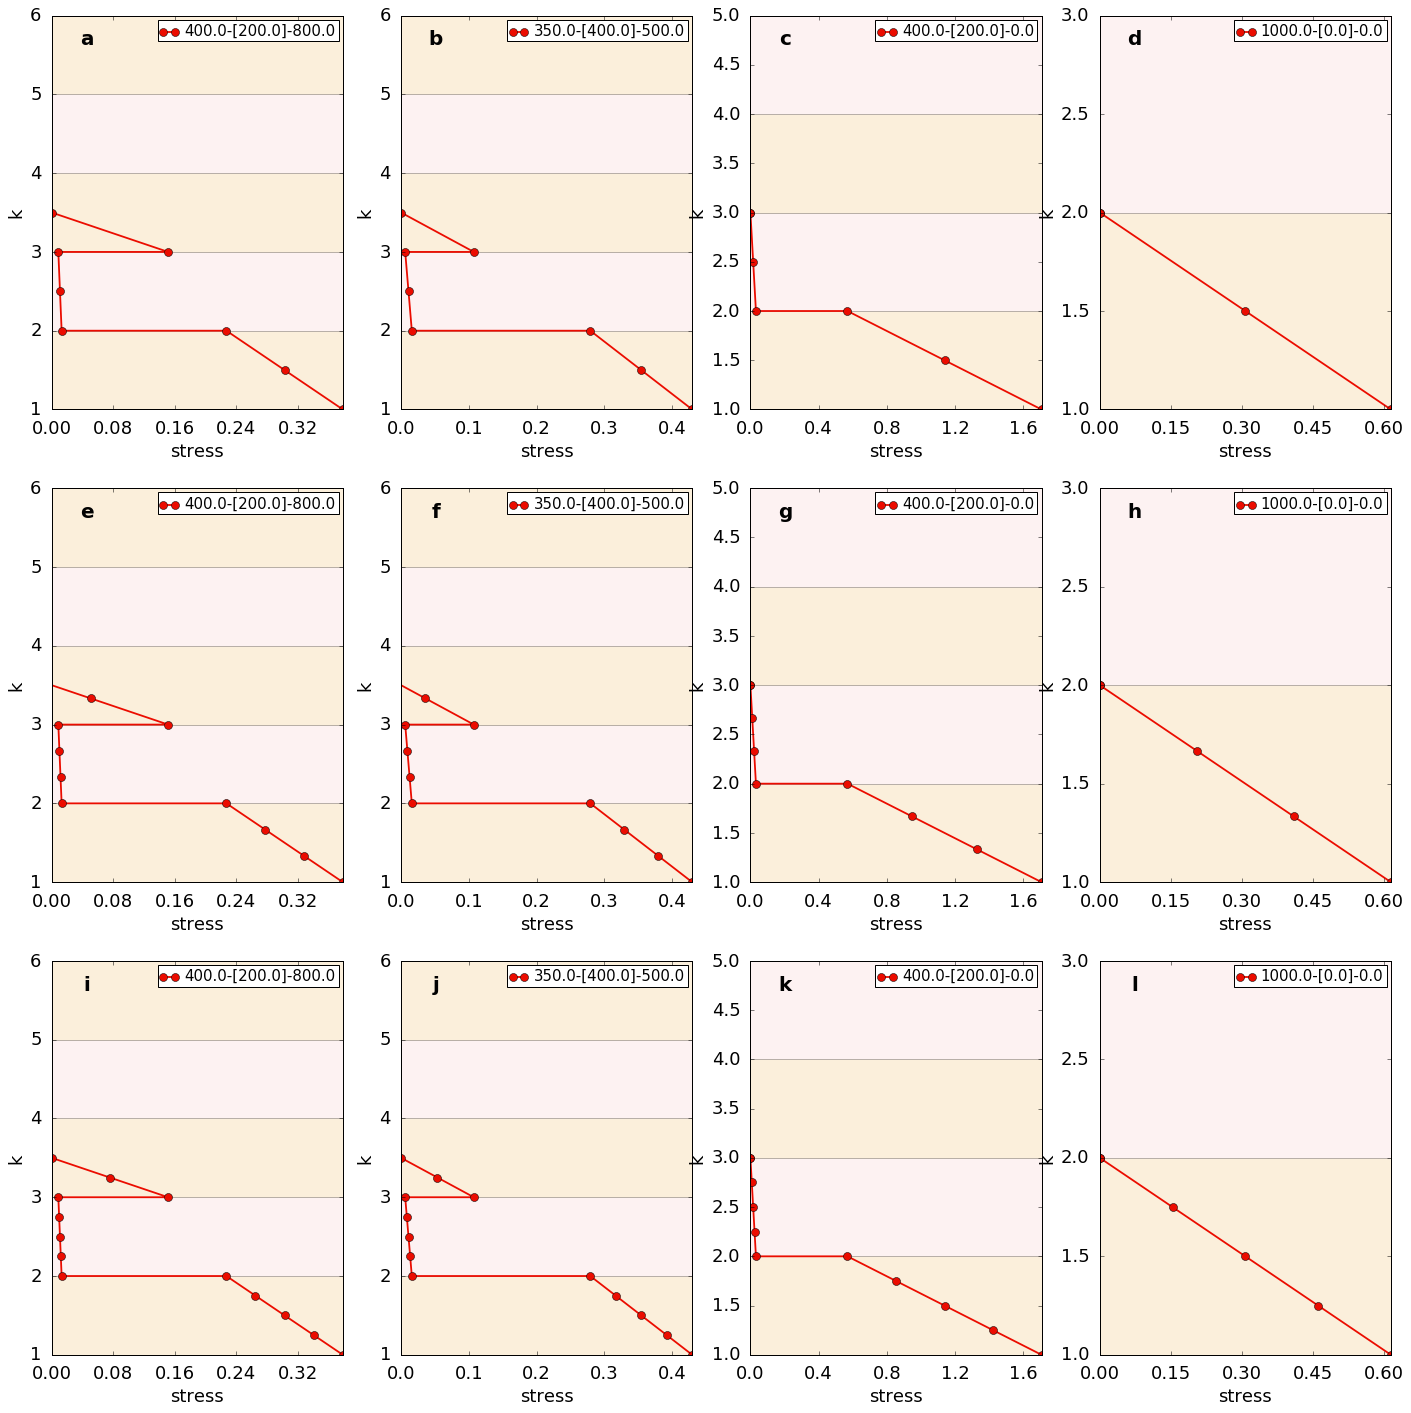

In [114]:
cases1.plot(extrema=False)

Each caselet can also be a separate case, plotting multiple geometries for each as accomplished with `Case`.

In [115]:
const_total = ['350-400-500',  '400-200-800', '200-200-1200',
               '200-100-1400', '100-100-1600', '100-200-1400',]
const_outer = ['400-550-100', '400-500-200', '400-450-300',
               '400-400-400', '400-350-500', '400-300-600',
               '400-250-700', '400-200-800', '400-0.5-1199']
const_inner = ['400-400-400', '350-400-500', '300-400-600',
               '200-400-700', '200-400-800', '150-400-990',
               '100-400-1000', '50-400-1100',]
const_middle = ['100-700-400', '150-650-400', '200-600-400',
                '250-550-400', '300-400-500', '350-450-400',
                '400-400-400', '450-350-400', '750-0.5-400']

case1_ = const_total
case2_ = const_outer
case3_ = const_inner
case4_ = const_middle

cases_ = [case1_, case2_, case3_, case4_]

In [116]:
cases3 = la.distributions.Cases(cases_, load_params=load_params,
                                mat_props=mat_props, model= 'Wilson_LT',
                                ps=[2,3]) 

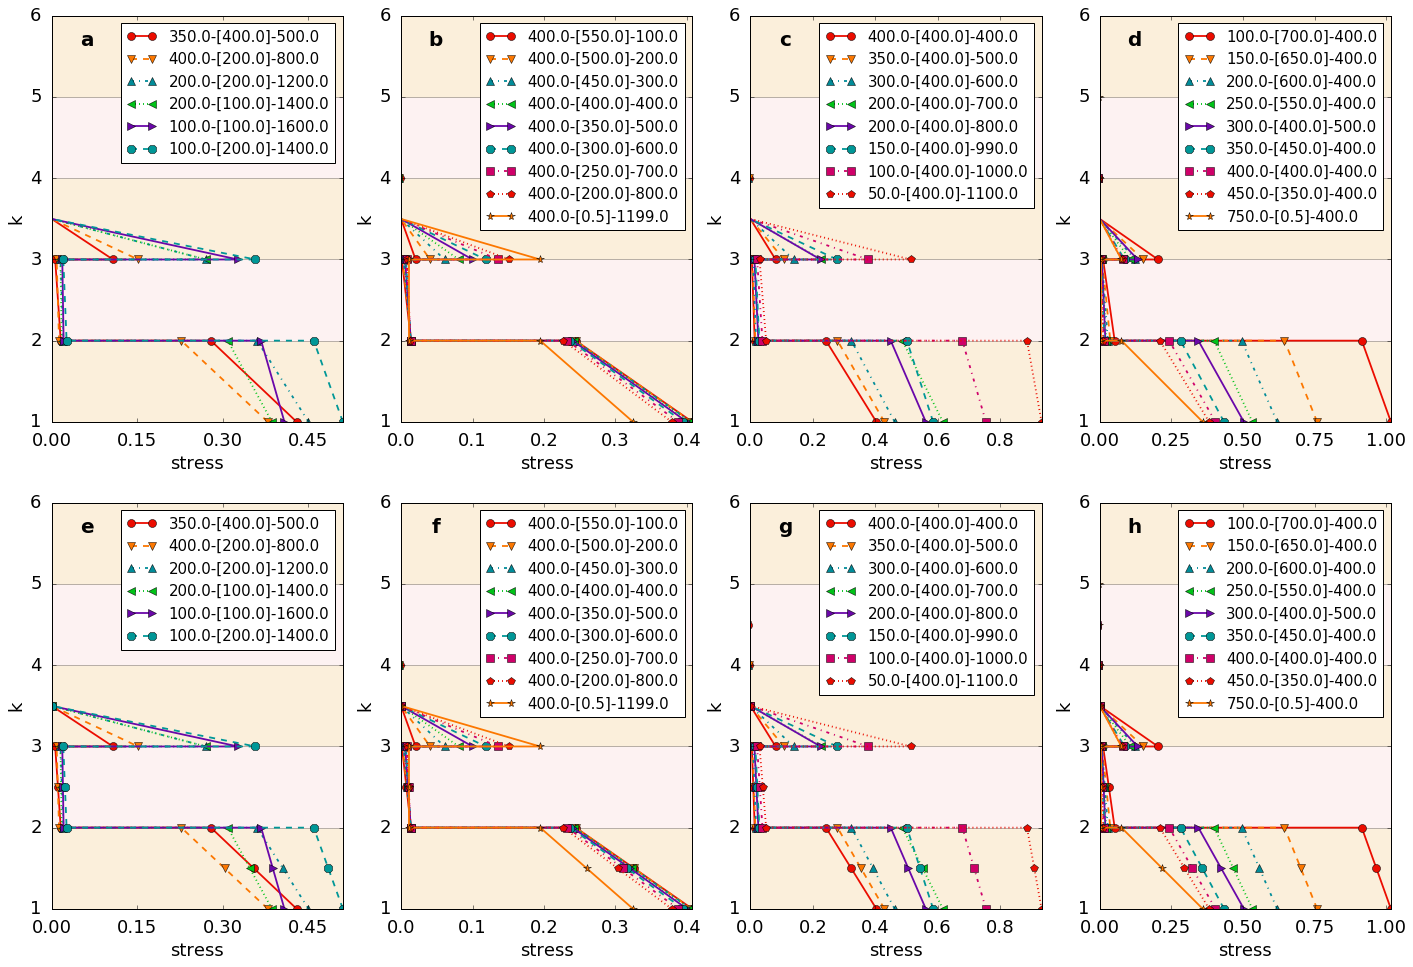

In [117]:
cases3.plot(extrema=False)

See Demo notebooks for more examples of plotting.

## More on Cases

In [118]:
'''Fix importing cases'''

'Fix importing cases'

In [119]:
from lamana.distributions import Cases

###### Applying caselets 

The term "caselet" is defined in LPEP 003.  Most importantly, the various types a caselet represents is handled by `Cases` and discussed here.  In 0.4.4b3+, caselets are contained in lists.  LPEP entertains the idea of containing caselets in dicts.

In [120]:
from lamana.models import Wilson_LT as wlt
dft = wlt.Defaults()

%matplotlib inline


str_caselets = ['350-400-500',  '400-200-800', '400-[200]-800']
list_caselets = [['400-400-400', '400-[400]-400'],
                 ['200-100-1400', '100-200-1400',], 
                 ['400-400-400', '400-200-800','350-400-500',], 
                 ['350-400-500']] 
case1 = la.distributions.Case(dft.load_params, dft.mat_props)
case2 = la.distributions.Case(dft.load_params, dft.mat_props)
case3 = la.distributions.Case(dft.load_params, dft.mat_props)
case1.apply(['400-200-800', '400-[200]-800'])
case2.apply(['350-400-500', '400-200-800'])
case3.apply(['350-400-500', '400-200-800', '400-400-400'])
case_caselets = [case1, case2, case3]
mixed_caselets = [['350-400-500', '400-200-800',],
                  [['400-400-400', '400-[400]-400'],
                   ['200-100-1400', '100-200-1400',]], 
                  [case1, case2,]
                 ]  
dict_caselets = {0: ['350-400-500',  '400-200-800', '200-200-1200',
                     '200-100-1400', '100-100-1600', '100-200-1400'],
                 1: ['400-550-100', '400-500-200', '400-450-300',
                     '400-400-400', '400-350-500', '400-300-600'],
                 2: ['400-400-400', '350-400-500', '300-400-600',
                     '200-400-700', '200-400-800', '150-400-990'],
                 3: ['100-700-400', '150-650-400', '200-600-400',
                     '250-550-400', '300-400-500', '350-450-400'], 
                 }

In [121]:
cases = Cases(str_caselets)
#cases = Cases(str_caselets, combine=True)
#cases = Cases(list_caselets)
#cases = Cases(list_caselets, combine=True)
#cases = Cases(case_caselets)
#cases = Cases(case_caselets, combine=True)                 # collapse to one plot
#cases = Cases(str_caselets, ps=[2,5])
#cases = Cases(list_caselets, ps=[2,3,5,7])
#cases = Cases(case_caselets, ps=[2,5])
#cases = Cases([], combine=True)                            # test raises


# For next versions
#cases = Cases(dict_caselets)
#cases = Cases(mixed_caselets)
#cases = Cases(mixed_caselets, combine=True) 
cases

<lamana.distributions.Cases object at 0x0000020229195B00>, {0: <<class 'lamana.distributions.Case'> p=5, size=1>, 1: <<class 'lamana.distributions.Case'> p=5, size=1>, 2: <<class 'lamana.distributions.Case'> p=5, size=1>}

In [122]:
cases.LMs

[<lamana LaminateModel object (350.0-[400.0]-500.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>]

In [123]:
'''BUG: Following cell raises an Exception in Python 2'''

'BUG: Following cell raises an Exception in Python 2'

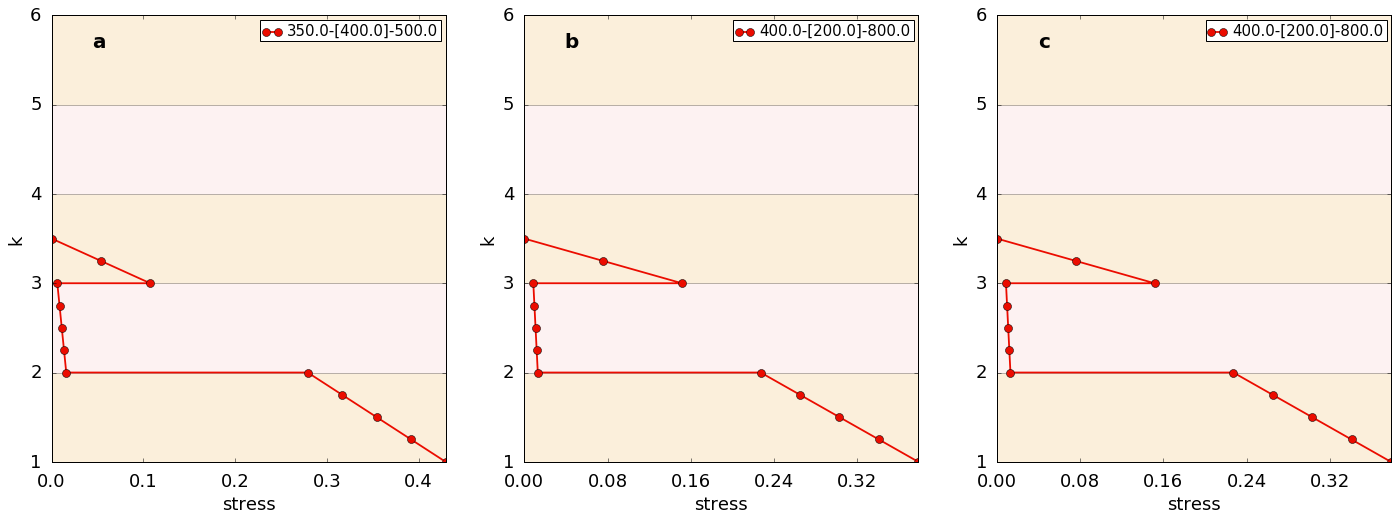

In [124]:
#cases.plot()
#cases.plot(normalized=False)
#cases.plot(colorblind=True, grayscale=True)
cases.plot(extrema=False)                                   # needed to see ps 

In [125]:
cases.caselets

['350.0-[400.0]-500.0', '400.0-[200.0]-800.0', '400.0-[200.0]-800.0']

In [126]:
'''get out tests from code'''
'''run tests'''
'''test set seletions'''

'test set seletions'

###### Characteristics

In [127]:
from lamana.models import Wilson_LT as wlt

dft = wlt.Defaults()
cases = Cases(dft.geo_inputs['5-ply'], ps=[2,3,4])

In [128]:
len(cases)                                                 # test __len__

9

In [129]:
cases.get(1)                                               # __getitem__

<<class 'lamana.distributions.Case'> p=2, size=1>

In [130]:
#cases[2] = 'test'                                         # __setitem__; not implemented

In [131]:
cases[0]                                                   # select

<<class 'lamana.distributions.Case'> p=2, size=1>

In [132]:
cases[0:2]                                                 # slice (__getitem__)   

[<<class 'lamana.distributions.Case'> p=2, size=1>,
 <<class 'lamana.distributions.Case'> p=2, size=1>]

In [133]:
del cases[1]                                               # __delitem__ 

In [134]:
cases                                                      # test __repr__ 

<lamana.distributions.Cases object at 0x0000020226931CC0>, {0: <<class 'lamana.distributions.Case'> p=2, size=1>, 2: <<class 'lamana.distributions.Case'> p=2, size=1>, 3: <<class 'lamana.distributions.Case'> p=3, size=1>, 4: <<class 'lamana.distributions.Case'> p=3, size=1>, 5: <<class 'lamana.distributions.Case'> p=3, size=1>, 6: <<class 'lamana.distributions.Case'> p=4, size=1>, 7: <<class 'lamana.distributions.Case'> p=4, size=1>, 8: <<class 'lamana.distributions.Case'> p=4, size=1>}

In [135]:
print(cases)                                               # test __str__    

{0: <<class 'lamana.distributions.Case'> p=2, size=1>, 2: <<class 'lamana.distributions.Case'> p=2, size=1>, 3: <<class 'lamana.distributions.Case'> p=3, size=1>, 4: <<class 'lamana.distributions.Case'> p=3, size=1>, 5: <<class 'lamana.distributions.Case'> p=3, size=1>, 6: <<class 'lamana.distributions.Case'> p=4, size=1>, 7: <<class 'lamana.distributions.Case'> p=4, size=1>, 8: <<class 'lamana.distributions.Case'> p=4, size=1>}


In [136]:
cases == cases                                             # test __eq__               

True

In [137]:
not cases != cases                                         # test __ne__ 

True

In [138]:
for i, case in enumerate(cases):                           # __iter__ values
    print(case)
    #print(case.LMs)

<<class 'lamana.distributions.Case'> p=2>
<<class 'lamana.distributions.Case'> p=2>
<<class 'lamana.distributions.Case'> p=3>
<<class 'lamana.distributions.Case'> p=3>
<<class 'lamana.distributions.Case'> p=3>
<<class 'lamana.distributions.Case'> p=4>
<<class 'lamana.distributions.Case'> p=4>
<<class 'lamana.distributions.Case'> p=4>


In [139]:
cases.LMs                                                  # peek inside cases

[<lamana LaminateModel object (400.0-[200.0]-800.0), p=2>,
 <lamana LaminateModel object (400.0-[200.0]-400.0S), p=2>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=3>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=3>,
 <lamana LaminateModel object (400.0-[200.0]-400.0S), p=3>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=4>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=4>,
 <lamana LaminateModel object (400.0-[200.0]-400.0S), p=4>]

In [140]:
cases.frames                                               # get a list of DataFrames directly

[   layer   side    type matl      label        ...           strain_r  \
 0      1  Tens.   outer   HA  interface        ...         3.4519e-06   
 1      1  Tens.   outer   HA   discont.        ...         2.0712e-06   
 2      2  Tens.   inner  PSu  interface        ...         2.0712e-06   
 3      2  Tens.   inner  PSu   discont.        ...         1.3808e-06   
 4      3  Tens.  middle   HA  interface        ...         1.3808e-06   
 5      3  Comp.  middle   HA  interface        ...        -1.3808e-06   
 6      4  Comp.   inner  PSu   discont.        ...        -1.3808e-06   
 7      4  Comp.   inner  PSu  interface        ...        -2.0712e-06   
 8      5  Comp.   outer   HA   discont.        ...        -2.0712e-06   
 9      5  Comp.   outer   HA  interface        ...        -3.4519e-06   
 
      strain_t  stress_r (Pa/N)  stress_t (Pa/N)  stress_f (MPa/N)  
 0  5.9651e-06      274182.8243      378730.6630            0.3787  
 1  3.5791e-06      164509.6946      227238.39

In [141]:
cases

<lamana.distributions.Cases object at 0x0000020226931CC0>, {0: <<class 'lamana.distributions.Case'> p=2, size=1>, 2: <<class 'lamana.distributions.Case'> p=2, size=1>, 3: <<class 'lamana.distributions.Case'> p=3, size=1>, 4: <<class 'lamana.distributions.Case'> p=3, size=1>, 5: <<class 'lamana.distributions.Case'> p=3, size=1>, 6: <<class 'lamana.distributions.Case'> p=4, size=1>, 7: <<class 'lamana.distributions.Case'> p=4, size=1>, 8: <<class 'lamana.distributions.Case'> p=4, size=1>}

In [142]:
#cases.to_csv()                                            # write to file

###### Unique Cases from Intersecting Caselets

`Cases` can check if caselet is unique by comparing the underlying geometry strings.  Here we have a non-unique caselets of different types.  We get unique results *within each caselet* using the `unique` keyword.  Notice, different caselets could have similar LaminateModels.

In [143]:
str_caselets = ['350-400-500',  '400-200-800', '400-[200]-800']
str_caselets2 = [['350-400-500', '350-[400]-500'],  
                 ['400-200-800', '400-[200]-800']]
list_caselets = [['400-400-400', '400-[400]-400'],
                 ['200-100-1400', '100-200-1400',], 
                 ['400-400-400', '400-200-800','350-400-500',], 
                 ['350-400-500']] 
case1 = la.distributions.Case(dft.load_params, dft.mat_props)
case2 = la.distributions.Case(dft.load_params, dft.mat_props)
case3 = la.distributions.Case(dft.load_params, dft.mat_props)
case1.apply(['400-200-800', '400-[200]-800'])
case2.apply(['350-400-500', '400-200-800'])
case3.apply(['350-400-500', '400-200-800', '400-400-400'])
case_caselets = [case1, case2, case3]

In [144]:
def process_cases(cases_):
    for i, case in enumerate(cases_):
        print('Case #: {}'.format(i)) 
        for LM in case.LMs:
            ##print(' {0}: {1:>4}'.format('LaminateModel', LM))   # Python 3.3
            print(' {0}: {1!r:>4}'.format('LaminateModel', LM)) # Python 3.4+

In [145]:
cases3 = Cases(str_caselets2, unique=True)
process_cases(cases3)

Case #: 0
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>
Case #: 1
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>


In [146]:
cases3 = Cases(list_caselets, unique=True)
process_cases(cases3)

Case #: 0
 LaminateModel: <lamana LaminateModel object (400.0-[400.0]-400.0), p=5>
Case #: 1
 LaminateModel: <lamana LaminateModel object (100.0-[200.0]-1400.0), p=5>
 LaminateModel: <lamana LaminateModel object (200.0-[100.0]-1400.0), p=5>
Case #: 2
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>
 LaminateModel: <lamana LaminateModel object (400.0-[400.0]-400.0), p=5>
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
Case #: 3
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>


In [147]:
cases3 = Cases(case_caselets, unique=True)
process_cases(cases3)

Case #: 0
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
Case #: 1
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
Case #: 2
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>
 LaminateModel: <lamana LaminateModel object (400.0-[400.0]-400.0), p=5>
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>


**Gotcha**: A single list of individual geometry strings is actually only one case.  

`str_caselets = ['350-400-500',  '400-200-800', '400-[200]-800']`

Since `Cases` is designed to produce multiple cases, it will create a separate subplot for each string by default.  When `unique=True`, since individual strings are already unique sets, `Cases` returns that same geometry.  No operation is performed, so a warning is prompted.

In [148]:
cases3 = Cases(str_caselets, unique=True)
process_cases(cases3)

Case #: 0
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>
Case #: 1
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
Case #: 2
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>


If it is desired to combine such a list into one plot, a convenient `combine` keyword is available if `Cases` is already loaded with parameters, but it is best to use `Case`.  The `unique` option is available and internally uses the native `Case(unique=True)` keyword.

In [149]:
cases3 = Cases(str_caselets, combine=True)
process_cases(cases3)

Case #: 0
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>


In [150]:
cases3 = Cases(str_caselets, combine=True, unique=True)
process_cases(cases3)

Case #: 0
 LaminateModel: <lamana LaminateModel object (350.0-[400.0]-500.0), p=5>
 LaminateModel: <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>


It is important to note that once set operations are performed, order is no longer a preserved.  This is related to how Python handles hashes.  This applies to `Cases()` in two areas:

- The `unique` keyword optionally invoked during instantiation.
- Any use of set operation via the `how` keyword within the `Cases.select()` method.

###### Revamped Idioms

**Gotcha**: Although a `Cases` instance is a dict, as if 0.4.4b3, it's `__iter__` method has been overriden to iterate the values by default (not the keys as in Python).  This choice was decided since keys are uninformative integers, while the values (curently cases )are of interest, which saves from typing .items() when interating a `Cases` instance.  

```python
    >>> cases = Cases()
    >>> for i, case in cases.items()                       # python
    >>> ... print(case)
    >>> for case in cases:                                 # modified
    >>> ... print(case)
```
This behavior may change in future versions.


In [151]:
#----------------------------------------------------------+

In [152]:
# Iterating Over Cases
from lamana.models import Wilson_LT as wlt
dft = wlt.Defaults()

In [153]:
# Multiple cases, Multiple LMs
cases = Cases(dft.geos_full, ps=[2,5])                    # two cases (p=2,5)
for i, case in enumerate(cases):                          # iter case values()
    print('Case #:', i)
    for LM in case.LMs:
        print(LM)
        
print("\nYou iterated several cases (ps=[2,5]) comprising many LaminateModels.")

Case #: 0
<lamana LaminateModel object (0.0-[0.0]-2000.0), p=2>
Case #: 1
<lamana LaminateModel object (1000.0-[0.0]-0.0), p=2>
Case #: 2
<lamana LaminateModel object (600.0-[0.0]-800.0), p=2>
Case #: 3
<lamana LaminateModel object (500.0-[500.0]-0.0), p=2>
Case #: 4
<lamana LaminateModel object (400.0-[200.0]-800.0), p=2>
Case #: 5
<lamana LaminateModel object (400.0-[100.0,100.0]-0.0), p=2>
Case #: 6
<lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=2>
Case #: 7
<lamana LaminateModel object (400.0-[100.0,100.0,100.0]-800.0), p=2>
Case #: 8
<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>
Case #: 9
<lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>
Case #: 10
<lamana LaminateModel object (600.0-[0.0]-800.0), p=5>
Case #: 11
<lamana LaminateModel object (500.0-[500.0]-0.0), p=5>
Case #: 12
<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
Case #: 13
<lamana LaminateModel object (400.0-[100.0,100.0]-0.0), p=5>
Case #: 14
<lamana LaminateModel object (400.0-[100.

In [154]:
# A single case, single LM
cases = Cases(['400-[200]-800'])                          # a single case and LM (manual)
for i, case_ in enumerate(cases):                         # iter i and case
    for LM in case_.LMs:
        print(LM)

print("\nYou processed a case and LaminateModel w/iteration.  (Recommended)\n")

<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>

You processed a case and LaminateModel w/iteration.  (Recommended)



In [155]:
# Single case, multiple LMs
cases = Cases(dft.geos_full)                              # auto, default p=5
for case in cases:                                        # iter case values()
    for LM in case.LMs:
        print(LM)
        
print("\nYou iterated a single case of many LaminateModels.")

<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>
<lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>
<lamana LaminateModel object (600.0-[0.0]-800.0), p=5>
<lamana LaminateModel object (500.0-[500.0]-0.0), p=5>
<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0]-0.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0,100.0]-800.0), p=5>

You iterated a single case of many LaminateModels.


###### Selecting

From cases, subsets of LaminateModels can be chosen.  `select` is a method that performs on and returns sets of LaminateModels.  Plotting functions are not implement for this method directly, however the reulsts can be used to make new cases instances from which `.plot()` is accessible.   Example access techniques using `Cases`.

- Access all cases : `cases`
- Access specific cases : `cases[0:2]`
- Access all LaminateModels : `cases.LMs`
- Access LaminateModels (within a case) : `cases.LMs[0:2]`
- Select a subset of LaminateModels from all cases : `cases.select(ps=[3,4])`

In [156]:
# Iterating Over Cases
from lamana.models import Wilson_LT as wlt
dft = wlt.Defaults()

In [157]:
#geometries = set(dft.geos_symmetric).union(dft.geos_special + dft.geos_standard + dft.geos_dissimilar)
#cases = Cases(geometries, ps=[2,3,4])
cases = Cases(dft.geos_special, ps=[2,3,4])

# Reveal the full listdft.geos_specia
# for case in cases:                                        # iter case values()
#     for LM in case.LMs:
#         print(LM)

In [158]:
# Test union of lists
#geometries

In [159]:
cases

<lamana.distributions.Cases object at 0x0000020228A2D0F0>, {0: <<class 'lamana.distributions.Case'> p=2, size=1>, 1: <<class 'lamana.distributions.Case'> p=2, size=1>, 2: <<class 'lamana.distributions.Case'> p=2, size=1>, 3: <<class 'lamana.distributions.Case'> p=2, size=1>, 4: <<class 'lamana.distributions.Case'> p=3, size=1>, 5: <<class 'lamana.distributions.Case'> p=3, size=1>, 6: <<class 'lamana.distributions.Case'> p=3, size=1>, 7: <<class 'lamana.distributions.Case'> p=3, size=1>, 8: <<class 'lamana.distributions.Case'> p=4, size=1>, 9: <<class 'lamana.distributions.Case'> p=4, size=1>, 10: <<class 'lamana.distributions.Case'> p=4, size=1>, 11: <<class 'lamana.distributions.Case'> p=4, size=1>}

In [160]:
'''Right now a case shares p, size.  cases share geometries and size.'''

'Right now a case shares p, size.  cases share geometries and size.'

In [161]:
cases[0:2]

[<<class 'lamana.distributions.Case'> p=2, size=1>,
 <<class 'lamana.distributions.Case'> p=2, size=1>]

In [162]:
'''Hard to see where these comem from.  Use dict?'''

'Hard to see where these comem from.  Use dict?'

In [163]:
cases.LMs

[<lamana LaminateModel object (0.0-[0.0]-2000.0), p=2>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=2>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=2>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=3>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=4>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>]

In [164]:
cases.LMs[0:6:2]
cases.LMs[0:4]

[<lamana LaminateModel object (0.0-[0.0]-2000.0), p=2>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=2>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=2>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>]

Selections from latter cases.

In [165]:
cases.select(nplies=[2,4])  

{<lamana LaminateModel object (500.0-[500.0]-0.0), p=4>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=2>}

In [166]:
cases.select(ps=[2,4])                                  

{<lamana LaminateModel object (600.0-[0.0]-800.0), p=4>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=2>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=4>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=2>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=2>}

In [167]:
cases.select(nplies=4)   

{<lamana LaminateModel object (500.0-[500.0]-0.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>}

In [168]:
cases.select(ps=3)    

{<lamana LaminateModel object (500.0-[500.0]-0.0), p=3>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=3>}

###### Advanced techniques: multiple selections.  

Set operations have been implemented in the selection method of `Cases` which enables filtering of unique LaminateModels that meet given conditions for `nplies` and `ps`.

- union: all LMs that meet either conditions (or)
- intersection: LMs that meet both conditions (and)
- difference: LMs 
- symmetric difference:

In [169]:
cases.select(nplies=4, ps=3)                             # union; default

{<lamana LaminateModel object (600.0-[0.0]-800.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=3>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>}

In [170]:
cases.select(nplies=4, ps=3, how='intersection')         # intersection

{<lamana LaminateModel object (500.0-[500.0]-0.0), p=3>}

By default, difference is subtracted as `set(ps) - set(nplies)`.  Currently there is no implementation for the converse difference, but set operations still work.

In [171]:
cases.select(nplies=4, ps=3, how='difference')          # difference

{<lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=3>}

In [172]:
cases.select(nplies=4) - cases.select(ps=3)             # set difference 

{<lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>}

In [173]:
'''How does this work?'''

'How does this work?'

In [174]:
cases.select(nplies=4, ps=3, how='symm diff')          # symm difference

{<lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>}

In [175]:
cases.select(nplies=[2,4], ps=[3,4], how='union')  

{<lamana LaminateModel object (600.0-[0.0]-800.0), p=4>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=3>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=4>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=3>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=2>}

In [176]:
cases.select(nplies=[2,4], ps=[3,4], how='intersection')  

{<lamana LaminateModel object (500.0-[500.0]-0.0), p=3>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>}

In [177]:
cases.select(nplies=[2,4], ps=3, how='difference')   

{<lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=3>}

In [178]:
cases.select(nplies=4, ps=[3,4], how='symmeric difference')

{<lamana LaminateModel object (600.0-[0.0]-800.0), p=4>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=3>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=4>,
 <lamana LaminateModel object (0.0-[0.0]-2000.0), p=3>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=2>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=4>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=3>}

Current logic seems to return a union.

###### Enhancing selection algorithms with set operations

Need logic to append LM for the following:

- all, either, neither (and, or, not or)
    - a, b are int
    - a, b are list
    - a, b are mixed
    - b, a are mixed

In [179]:
import numpy as np
a = []
b = 1
c = np.int64(1)
d = [1,2]
e = [1,2,3]
f = [3,4]

test = 1

test in a
#test in b
#test is a
test is c
# if test is a or test is c:
#     True

False

In [180]:
from lamana.utils import tools as ut
ut.compare_set(d, e)
ut.compare_set(b, d, how='intersection')
ut.compare_set(d, b, how='difference')
ut.compare_set(e, f, how='symmertric difference')
ut.compare_set(d, e, test='issubset')
ut.compare_set(e, d, test='issuperset')
ut.compare_set(d, f, test='isdisjoint')

True

In [181]:
set(d) ^ set(e)
ut.compare_set(d,e, how='symm')

{3}

In [182]:
g1 = dft.Geo_objects['5-ply'][0]
g2 = dft.Geo_objects['5-ply'][1]

In [183]:
cases = Cases(dft.geos_full, ps=[2,5])                    # two cases (p=2,5)
for i, case in enumerate(cases):                          # iter case values()
    for LM in case.LMs:
        print(LM)

<lamana LaminateModel object (0.0-[0.0]-2000.0), p=2>
<lamana LaminateModel object (1000.0-[0.0]-0.0), p=2>
<lamana LaminateModel object (600.0-[0.0]-800.0), p=2>
<lamana LaminateModel object (500.0-[500.0]-0.0), p=2>
<lamana LaminateModel object (400.0-[200.0]-800.0), p=2>
<lamana LaminateModel object (400.0-[100.0,100.0]-0.0), p=2>
<lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=2>
<lamana LaminateModel object (400.0-[100.0,100.0,100.0]-800.0), p=2>
<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>
<lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>
<lamana LaminateModel object (600.0-[0.0]-800.0), p=5>
<lamana LaminateModel object (500.0-[500.0]-0.0), p=5>
<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0]-0.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0,100.0]-800.0), p=5>


In order to compare objects in sets, they must be hashable. The simple requirement equality is include whatever makes the hash of a equal to the hash of b.  Ideally, we should hash the Geometry object, but the inner values is a list which is unhashable due to its mutability.  Conventiently however, strings are not hashable.  We can try to hash the geometry input string once they have been converted to General Convention as unique identifiers for the geometry object.  This requires some reorganization in `Geometry`.

- ~~isolate a converter function `_to_gen_convention()`~~
- privative all functions invisible to the API
- ~~hash the converted `geo_strings`~~
- ~~privatize `_geo_strings`.  This cannot be altered by the user.~~

Here we see the advantage to using geo_strings as hashables.  They are inheirently hashable.

UPDATE: decided to make a hashalbe version of the `GeometryTuple`

In [184]:
hash('400-200-800')

-2195934914257338913

In [185]:
hash('400-[200]-800')

4652800283216586409

Need to make `Laminate` class hashable.  Try to use unique identifiers such as Geometry and p.

In [186]:
hash((case.LMs[0].Geometry, case.LMs[0].p))

1570369202565922880

In [187]:
case.LMs[0]

<lamana LaminateModel object (400.0-[100.0,100.0,100.0]-800.0), p=5>

In [188]:
L = [LM for case in cases for LM in case.LMs]

In [189]:
L[0]

<lamana LaminateModel object (0.0-[0.0]-2000.0), p=2>

In [190]:
L[8]

<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>

In [191]:
hash((L[0].Geometry, L[0].p))

4636833212297578389

In [192]:
hash((L[1].Geometry, L[1].p))

5861696211961991069

In [193]:
set([L[0]]) != set([L[8]])

True

Use sets to filter unique geometry objects from `Defaults()`.

In [194]:
from lamana.models import Wilson_LT as wlt

dft = wlt.Defaults()

mix = dft.Geos_full + dft.Geos_all

In [195]:
mix

[Geometry object (0.0-[0.0]-2000.0),
 Geometry object (1000.0-[0.0]-0.0),
 Geometry object (600.0-[0.0]-800.0),
 Geometry object (500.0-[500.0]-0.0),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[100.0,100.0]-0.0),
 Geometry object (400.0-[100.0,100.0]-800.0),
 Geometry object (400.0-[100.0,100.0,100.0]-800.0),
 Geometry object (0.0-[0.0]-2000.0),
 Geometry object (0.0-[0.0]-1000.0),
 Geometry object (1000.0-[0.0]-0.0),
 Geometry object (600.0-[0.0]-800.0),
 Geometry object (600.0-[0.0]-400.0S),
 Geometry object (500.0-[500.0]-0.0),
 Geometry object (400.0-[200.0]-0.0),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[200.0]-400.0S),
 Geometry object (400.0-[100.0,100.0]-0.0),
 Geometry object (500.0-[250.0,250.0]-0.0),
 Geometry object (400.0-[100.0,100.0]-800.0),
 Geometry object (400.0-[100.0,100.0]-400.0S),
 Geometry object (400.0-[100.0,100.0,100.0]-800.0),
 Geometry object (500.0-[50.0,50.0,50.0,50.0]-0.0)

In [196]:
set(mix)

{Geometry object (400.0-[200.0]-800.0),
 Geometry object (400.0-[100.0,100.0]-0.0),
 Geometry object (1000.0-[0.0]-0.0),
 Geometry object (400.0-[100.0,100.0]-800.0),
 Geometry object (400.0-[200.0]-0.0),
 Geometry object (400.0-[200.0]-400.0S),
 Geometry object (400.0-[100.0,100.0,100.0]-800.0),
 Geometry object (400.0-[100.0,100.0]-400.0S),
 Geometry object (600.0-[0.0]-800.0),
 Geometry object (0.0-[0.0]-1000.0),
 Geometry object (600.0-[0.0]-400.0S),
 Geometry object (500.0-[250.0,250.0]-0.0),
 Geometry object (500.0-[50.0,50.0,50.0,50.0]-0.0),
 Geometry object (400.0-[100.0,100.0,100.0,100.0]-800.0),
 Geometry object (400.0-[100.0,100.0,100.0,100.0,100.0]-800.0),
 Geometry object (0.0-[0.0]-2000.0),
 Geometry object (500.0-[500.0]-0.0)}

## Mixing Geometries

See above.  Looks like comparing the order of these lists give different results. This test has been quarantine from the repo until a solution is found.

In [197]:
mix = dft.geos_most + dft.geos_standard                   # 400-[200]-800 common to both 
cases3a = Cases(mix, combine=True, unique=True)
cases3a.LMs

[<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=5>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>]

In [198]:
load_params['p'] = 5
cases3b5 = la.distributions.Case(load_params, dft.mat_props)
cases3b5.apply(mix) 

In [199]:
cases3b5.LMs[:-1]

[<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>,
 <lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>,
 <lamana LaminateModel object (600.0-[0.0]-800.0), p=5>,
 <lamana LaminateModel object (500.0-[500.0]-0.0), p=5>,
 <lamana LaminateModel object (400.0-[200.0]-800.0), p=5>]

## Idiomatic Case Making

As we transition to more automated techniques, tf parameters are to be reused multiple times, it can be helpful to store them as default values.

In [200]:
'''Add how to build Defaults()'''

'Add how to build Defaults()'

In [201]:
# Case Building from Defaults
import lamana as la
from lamana.utils import tools as ut
from lamana.models import Wilson_LT as wlt

dft = wlt.Defaults()
##dft = ut.Defaults()                                        # user-definable
case2 = la.distributions.Case(dft.load_params, dft.mat_props)
case2.apply(dft.geos_full)                                 # multi plies
#LM = case2.LMs[0]
#LM.LMFrame
print("\nYou have built a case using user-defined defaults to set geometric \
loading and material parameters.")
case2


You have built a case using user-defined defaults to set geometric loading and material parameters.


<<class 'lamana.distributions.Case'> p=5, size=8>

Finally, if building several cases is required for the same parameters, we can use higher-level API tools to help automate the process.  

*Note, for every case that is created, a seperate `Case()` instantiation and `Case.apply()` call is required.  These techniques obviate such redundancies.*

In [202]:
# Automatic Case Building
import lamana as la
from lamana.utils import tools as ut

#Single Case
dft = wlt.Defaults()
##dft = ut.Defaults()
case3 = ut.laminator(dft.geos_full)                       # auto, default p=5
case3 = ut.laminator(dft.geos_full, ps=[5])               # declared
#case3 = ut.laminator(dft.geos_full, ps=[1])               # LFrame rollbacks
print("\nYou have built a case using higher-level API functions.")
case3


You have built a case using higher-level API functions.


{0: <<class 'lamana.distributions.Case'> p=5, size=8>}

In [203]:
# How to get values from a single case (Python 3 compatible)
list(case3.values())

[<<class 'lamana.distributions.Case'> p=5, size=8>]

Cases are differentiated by different ps.

In [204]:
# Multiple Cases
cases1 = ut.laminator(dft.geos_full, ps=[2,3,4,5])         # multi ply, multi p   
print("\nYou have built many cases using higher-level API functions.")
cases1


You have built many cases using higher-level API functions.


{0: <<class 'lamana.distributions.Case'> p=2, size=8>,
 1: <<class 'lamana.distributions.Case'> p=3, size=8>,
 2: <<class 'lamana.distributions.Case'> p=4, size=8>,
 3: <<class 'lamana.distributions.Case'> p=5, size=8>}

In [205]:
# How to get values from multiple cases (Python 3 compatible)
list(cases1.values())

[<<class 'lamana.distributions.Case'> p=2, size=8>,
 <<class 'lamana.distributions.Case'> p=3, size=8>,
 <<class 'lamana.distributions.Case'> p=4, size=8>,
 <<class 'lamana.distributions.Case'> p=5, size=8>]

Python 3 no longer returns a list for `.values()` method, so list used to evalate a the dictionary view.  While consuming a case's, dict value view with `list()` works in Python 2 and 3, iteration with loops and comprehensions is a preferred technique for both single and mutiple case processing. After cases are accessed, iteration can access the contetnts of all cases.  Iteration is the preferred technique for processing cases.  It is most general, cleaner, Py2/3 compatible out of the box and agrees with The Zen of Python:

> There should be one-- and preferably only one --obvious way to do it.

In [206]:
# Iterating Over Cases
# Latest style
case4 = ut.laminator(['400-[200]-800'])                   # a sinle case and LM
for i, case_ in case4.items():                            # iter p and case
    for LM in case_.LMs:
        print(LM)

print("\nYou processed a case and LaminateModel w/iteration.  (Recommended)\n")
        
case5 = ut.laminator(dft.geos_full)                       # auto, default p=5
for i, case in case5.items():                             # iter p and case with .items()
    for LM in case.LMs:
        print(LM)
        
for case in case5.values():                               # iter case only with .values() 
    for LM in case.LMs:
        print(LM)

print("\nYou processed many cases using Case object methods.")

<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>

You processed a case and LaminateModel w/iteration.  (Recommended)

<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>
<lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>
<lamana LaminateModel object (600.0-[0.0]-800.0), p=5>
<lamana LaminateModel object (500.0-[500.0]-0.0), p=5>
<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0]-0.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0,100.0]-800.0), p=5>
<lamana LaminateModel object (0.0-[0.0]-2000.0), p=5>
<lamana LaminateModel object (1000.0-[0.0]-0.0), p=5>
<lamana LaminateModel object (600.0-[0.0]-800.0), p=5>
<lamana LaminateModel object (500.0-[500.0]-0.0), p=5>
<lamana LaminateModel object (400.0-[200.0]-800.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0]-0.0), p=5>
<lamana LaminateModel object (400.0-[100.0,100.0]-800.0), p=5>
<lamana

In [207]:
# Convert case dict to generator
case_gen1 = (LM for p, case in case4.items() for LM in case.LMs)

# Generator without keys
case_gen2 = (LM for case in case4.values() for LM in case.LMs)

print("\nYou have captured a case in a generator for later, one-time use.")


You have captured a case in a generator for later, one-time use.


We will demonstrate comparing two techniques for generating equivalent cases.

In [208]:
# Style Comparisons
dft = wlt.Defaults()
##dft = ut.Defaults()

case1 = la.distributions.Case(load_params, mat_props) 
case1.apply(dft.geos_all)

cases = ut.laminator(geos=dft.geos_all)
case2 = cases

# Equivalent calls
print(case1)
print(case2)

print("\nYou have used classic and modern styles to build equivalent cases.")

<<class 'lamana.distributions.Case'> p=5>
{0: <<class 'lamana.distributions.Case'> p=5, size=18>}

You have used classic and modern styles to build equivalent cases.
